In [1]:
import fenics as fn
import numpy as np
from matplotlib import pyplot as plt

Let $U_1$ be a finite element space
$$U_1 = \langle\{\phi_1, \phi_2, \dots, \phi_n\}\rangle$$
then, any function in this space is can be written as a linear combination of the basis functions:
$$u(x) =\sum_{i=1}^{n}\alpha_i \phi_i(x)$$
The coefficients $\{\alpha_1,\alpha_2,\dots,\alpha_n\}$ are usually called degrees of freedom.

**We define a coarse mesh with four elements**

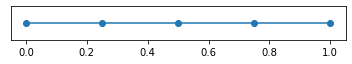

In [2]:
mesh = fn.UnitIntervalMesh(4)
fn.plot(mesh)

**We define me mixed FE space from $U_1$ and $U_2$**

In [3]:
U1 = fn.FiniteElement('CG',mesh.ufl_cell(),1)
U2 = fn.FiniteElement('CG',mesh.ufl_cell(),1)
#
W = fn.FunctionSpace(mesh,U1*U2)

**We define Fenics expressions in two different ways**

In [4]:
A      = 1.
B      = 2.
f1_str = 'A*sin(2*pi*x[0])'
f2_str = 'B*cos(2*pi*x[0])'
# As two component function
f      = fn.Expression((f1_str,f2_str),A=A,B=A,degree=1)
# and two different expressions for each component 
f1     = fn.Expression(f1_str,A=A,B=A,degree=1)
f2     = fn.Expression(f2_str,A=A,B=A,degree=1)

**Notice that each of these expressions can be evaluated**

In [5]:
print('f(0.25) :',f(0.25))  
print('f1(0.25):',f1(0.25))
print('f2(0.25):',f2(0.25))

f(0.25) : [1.000000e+00 6.123234e-17]
f1(0.25): 1.0
f2(0.25): 6.123233995736766e-17


**Now we interpolate f into a function of the mixed space $W$**

In [6]:
u = fn.Function(W)
u.interpolate(f)

**Here we can also evaluate $u$**

In [7]:
# Notice if you change 0.25 for for a point that is not a mesh node
# you will get a different value of f
print('u(0.25) :',u(0.25))

u(0.25) : [1.000000e+00 6.123234e-17]


**We can see the degrees of freedom (dofs)**

In [8]:
print('u dofs  :\n',u.vector()[:])
print('# u dofs:\n',np.shape(u.vector()[:])[0])

u dofs  :
 [-2.4492936e-16  1.0000000e+00 -1.0000000e+00 -1.8369702e-16
  1.2246468e-16 -1.0000000e+00  1.0000000e+00  6.1232340e-17
  0.0000000e+00  1.0000000e+00]
# u dofs:
 10


**Notice we cannot plot $u$**

AttributeError: Vector length must match geometric dimension.

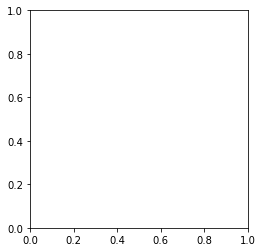

In [9]:
fn.plot(u)

**But, we can plot each of the components**

In [10]:
u1, u2 = u.split()

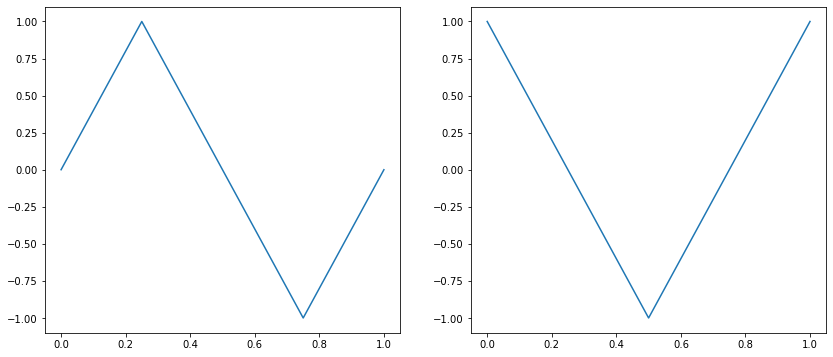

In [11]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
fn.plot(u1)
ax2 = fig.add_subplot(122)
fn.plot(u2)
plt.show()

**Notice Fenics keeps all the dofs of $u$ on each component $u_1$ and $u_2$ (weird, I know!)**

In [12]:
print('u dofs  :\n',u.vector()[:])
print('u1 dofs :\n',u1.vector()[:])
print('u2 dofs :\n',u2.vector()[:])

u dofs  :
 [-2.4492936e-16  1.0000000e+00 -1.0000000e+00 -1.8369702e-16
  1.2246468e-16 -1.0000000e+00  1.0000000e+00  6.1232340e-17
  0.0000000e+00  1.0000000e+00]
u1 dofs :
 [-2.4492936e-16  1.0000000e+00 -1.0000000e+00 -1.8369702e-16
  1.2246468e-16 -1.0000000e+00  1.0000000e+00  6.1232340e-17
  0.0000000e+00  1.0000000e+00]
u2 dofs :
 [-2.4492936e-16  1.0000000e+00 -1.0000000e+00 -1.8369702e-16
  1.2246468e-16 -1.0000000e+00  1.0000000e+00  6.1232340e-17
  0.0000000e+00  1.0000000e+00]


## What if...

**We define directily the interpolation over the subspaces**

In [13]:
v1 = fn.interpolate(f1, W.sub(0).collapse())
v2 = fn.interpolate(f2, W.sub(0).collapse())

**We can evaluate $v_1$ and $v_2$**

In [14]:
print('v1(0.25):',v1(0.25))
print('v2(0.25):',v2(0.25))

v1(0.25): 1.0
v2(0.25): 6.123233995736766e-17


**We can see the dofs**

In [15]:
print('v1 dofs  :\n',v1.vector()[:])
print('# v1 dofs:\n',np.shape(v1.vector()[:])[0])
#
print('v2 dofs  :\n',v2.vector()[:])
print('# v2 dofs:\n',np.shape(v2.vector()[:])[0])

v1 dofs  :
 [-2.4492936e-16 -1.0000000e+00  1.2246468e-16  1.0000000e+00
  0.0000000e+00]
# v1 dofs:
 5
v2 dofs  :
 [ 1.0000000e+00 -1.8369702e-16 -1.0000000e+00  6.1232340e-17
  1.0000000e+00]
# v2 dofs:
 5


**We can plot the functions**

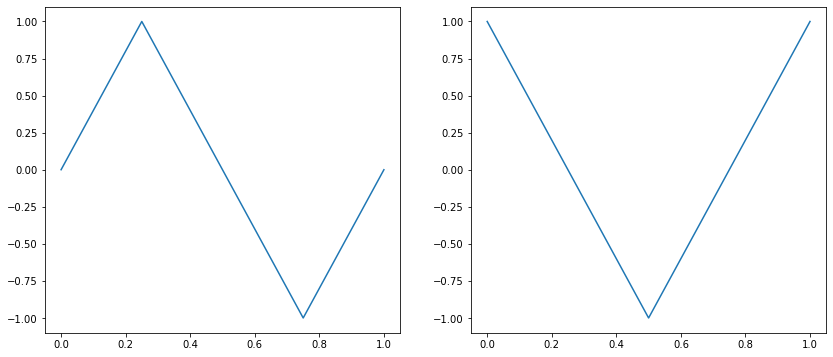

In [16]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
fn.plot(v1)
ax2 = fig.add_subplot(122)
fn.plot(v2)
plt.show()

## Can we mix them?

let's try to sum $u_1$ and $v_1$

In [17]:
w1 = u1 + v1

**does this work? It seems so...**
$$\int_{0}^{1}u_1 + v_1 \,dx = \int_{0}^{1}2\sin(2\pi x) \,dx = 0$$

In [18]:
fn.assemble(w1*(fn.dx))

-5.551115123125783e-17

**Let's also compare with**
$$\int_{0}^{1}u_1 + u_1 \,dx$$

In [19]:
fn.assemble((u1+u1)*(fn.dx))

-5.551115123125783e-17

**Can we evaluate $w_1$? Nope**

In [20]:
print('w1(0.25):',w1(0.25))

TypeError: f_8-0 argument after * must be an iterable, not float

**Can we see the dofs? Nope!**

In [21]:
print('w1 dofs  :\n',w1.vector()[:])

AttributeError: 'Sum' object has no attribute 'vector'